# LDA IbiS

In [5]:
import pandas as pd 
import numpy as np
import re

##LDA stuff
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
import pyprojroot.here as here

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ammarbagharib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df = pd.read_csv(here('data/cleaned/cleaned_ibis-sg-bencoolen.csv'))
df.head()

,Unnamed: 0,date_of_stay,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating1,rating2,rating,valid_rating,label,cleaned_review,combined_review,date,covid
0,0,Date of stay: August 2023,Love_Life_Sydney,Clean and comfortable,Hotel rooms in Singapore are so expensive so t...,Trip type: Travelled as a couple,"Sydney, Australia",2302.0,871.0,NaN,4.0,4.0,True,Positive,clean comfortable hotel room singapore expensi...,Clean and comfortable Hotel rooms in Singapore...,2023-08-01,PostCovid
1,1,Date of stay: August 2023,Bilal S,"Good hotel, great location",This is a great place! Location is great but t...,Trip type: Travelled with family,"Houston, Texas",4.0,NaN,5.0,NaN,5.0,True,Positive,good hotel great location great place location...,"Good hotel, great location This is a great pl...",2023-08-01,PostCovid
2,2,Date of stay: October 2022,Anthony Fernando,Good place for a decent price.,Good place good price Easy access to the city...,Trip type: Travelled with friends,"Dubai, United Arab Emirates",39.0,38.0,5.0,NaN,5.0,True,Positive,good place decent price good place good price ...,Good place for a decent price. Good place good...,2022-10-01,PostCovid
3,3,Date of stay: August 2023,Mjkc204,Great Location and great staff.,The IBIS was a neat and tidy hotel in line wit...,Trip type: Travelled solo,"Ellenbrook, Australia",37.0,19.0,5.0,NaN,5.0,True,Positive,great location great staff ibis neat tidy hote...,Great Location and great staff. The IBIS was a...,2023-08-01,PostCovid
4,4,Date of stay: August 2022,Aung Nanda,Good for budget stay.,I stayed there for 7 days. It was a nice locat...,Trip type: Travelled on business,"Dubai, United Arab Emirates",3.0,4.0,NaN,4.0,4.0,True,Positive,good budget stay I stay day nice location seve...,Good for budget stay. I stayed there for 7 day...,2022-08-01,PostCovid


In [10]:
df_precovid = df[df['covid'] == 'PreCovid']
df_precovid.head()

,Unnamed: 0,date_of_stay,traveller_username,review_title,review_text,travel_type,traveller_country_origin,traveller_total_contributions,traveller_total_helpful_contributions,rating1,rating2,rating,valid_rating,label,cleaned_review,combined_review,date,covid
66,66,Date of stay: December 2019,Beatrice,Cozy Hotel,I spent 2 night at this hotel and all the serv...,NaN,"Batam, Indonesia",8.0,13.0,5.0,NaN,5.0,True,Positive,cozy hotel I spend night hotel service provide...,Cozy Hotel I spent 2 night at this hotel and a...,2019-12-01,PreCovid
67,67,Date of stay: January 2020,dinu79,"Smart, Clean, Good Location, Value for money",This was my second stay at Ibis Bencoolen. B...,NaN,"Dubai, United Arab Emirates",212.0,53.0,4.0,NaN,4.0,True,Positive,smart clean good location value money second s...,"Smart, Clean, Good Location, Value for money T...",2020-01-01,PreCovid
68,68,Date of stay: October 2019,Marsha F,Wonderful experience,"This was our first time at this hotel, and won...",NaN,"Gatineau, Canada",32.0,45.0,4.0,NaN,4.0,True,Positive,wonderful experience first time hotel win last...,Wonderful experience This was our first time a...,2019-10-01,PreCovid
69,69,Date of stay: October 2019,Geoff_and_Juls,Great Base for Tourists,"Firstly, the good points: Comfortable and clea...",NaN,"Mellieha, Malta",276.0,169.0,4.0,NaN,4.0,True,Positive,great base tourist firstly good point comforta...,"Great Base for Tourists Firstly, the good poin...",2019-10-01,PreCovid
70,70,Date of stay: October 2019,Gianluca3008,BEST LOCATION,"Very comfortable hotel, nice staff, totally in...",NaN,"Rome, Italy",2192.0,280.0,NaN,4.0,4.0,True,Positive,good location comfortable hotel nice staff tot...,"BEST LOCATION Very comfortable hotel, nice sta...",2019-10-01,PreCovid


## No Stemming PreCovid

In [79]:
analysis = []
stop_words = set(stopwords.words('english'))
for i, r in df_precovid.iterrows():
    r_lower = r['cleaned_review'].lower()
    res = word_tokenize(r_lower)
    analysis.append([w for w in res if w not in stop_words])


In [80]:
dictionary = corpora.Dictionary(analysis)
words = analysis
corpus = [dictionary.doc2bow(text) for text in words]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 4),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 2),
 (16, 1),
 (17, 1)]

In [81]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=6)
print(lda_model.print_topics())

[(0, '0.027*"room" + 0.027*"hotel" + 0.021*"stay" + 0.020*"good" + 0.014*"great" + 0.013*"breakfast" + 0.012*"location" + 0.010*"small" + 0.010*"walk" + 0.009*"check"'), (1, '0.031*"hotel" + 0.019*"room" + 0.014*"good" + 0.014*"stay" + 0.013*"great" + 0.013*"location" + 0.012*"singapore" + 0.011*"staff" + 0.011*"ibis" + 0.009*"small"'), (2, '0.032*"hotel" + 0.028*"room" + 0.022*"stay" + 0.021*"good" + 0.017*"location" + 0.012*"great" + 0.011*"clean" + 0.011*"bugis" + 0.009*"staff" + 0.009*"bed"'), (3, '0.033*"hotel" + 0.032*"room" + 0.021*"good" + 0.013*"clean" + 0.013*"bugis" + 0.013*"location" + 0.012*"stay" + 0.010*"staff" + 0.010*"service" + 0.008*"mrt"'), (4, '0.038*"hotel" + 0.030*"room" + 0.023*"stay" + 0.018*"location" + 0.017*"good" + 0.015*"ibis" + 0.014*"singapore" + 0.014*"clean" + 0.011*"staff" + 0.011*"bugis"'), (5, '0.044*"hotel" + 0.038*"good" + 0.022*"room" + 0.014*"singapore" + 0.014*"staff" + 0.013*"stay" + 0.013*"ibis" + 0.012*"location" + 0.010*"clean" + 0.008*"gre

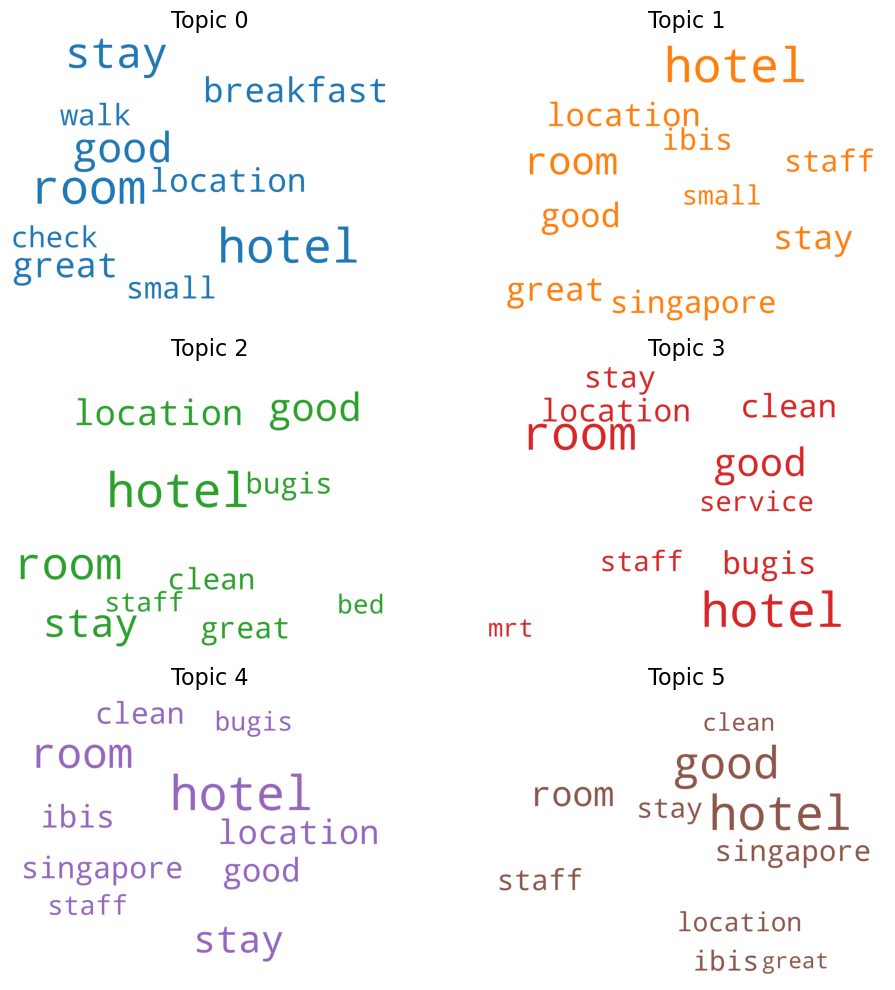

In [82]:
##visualisation
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

##From https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_2972\2069385899.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


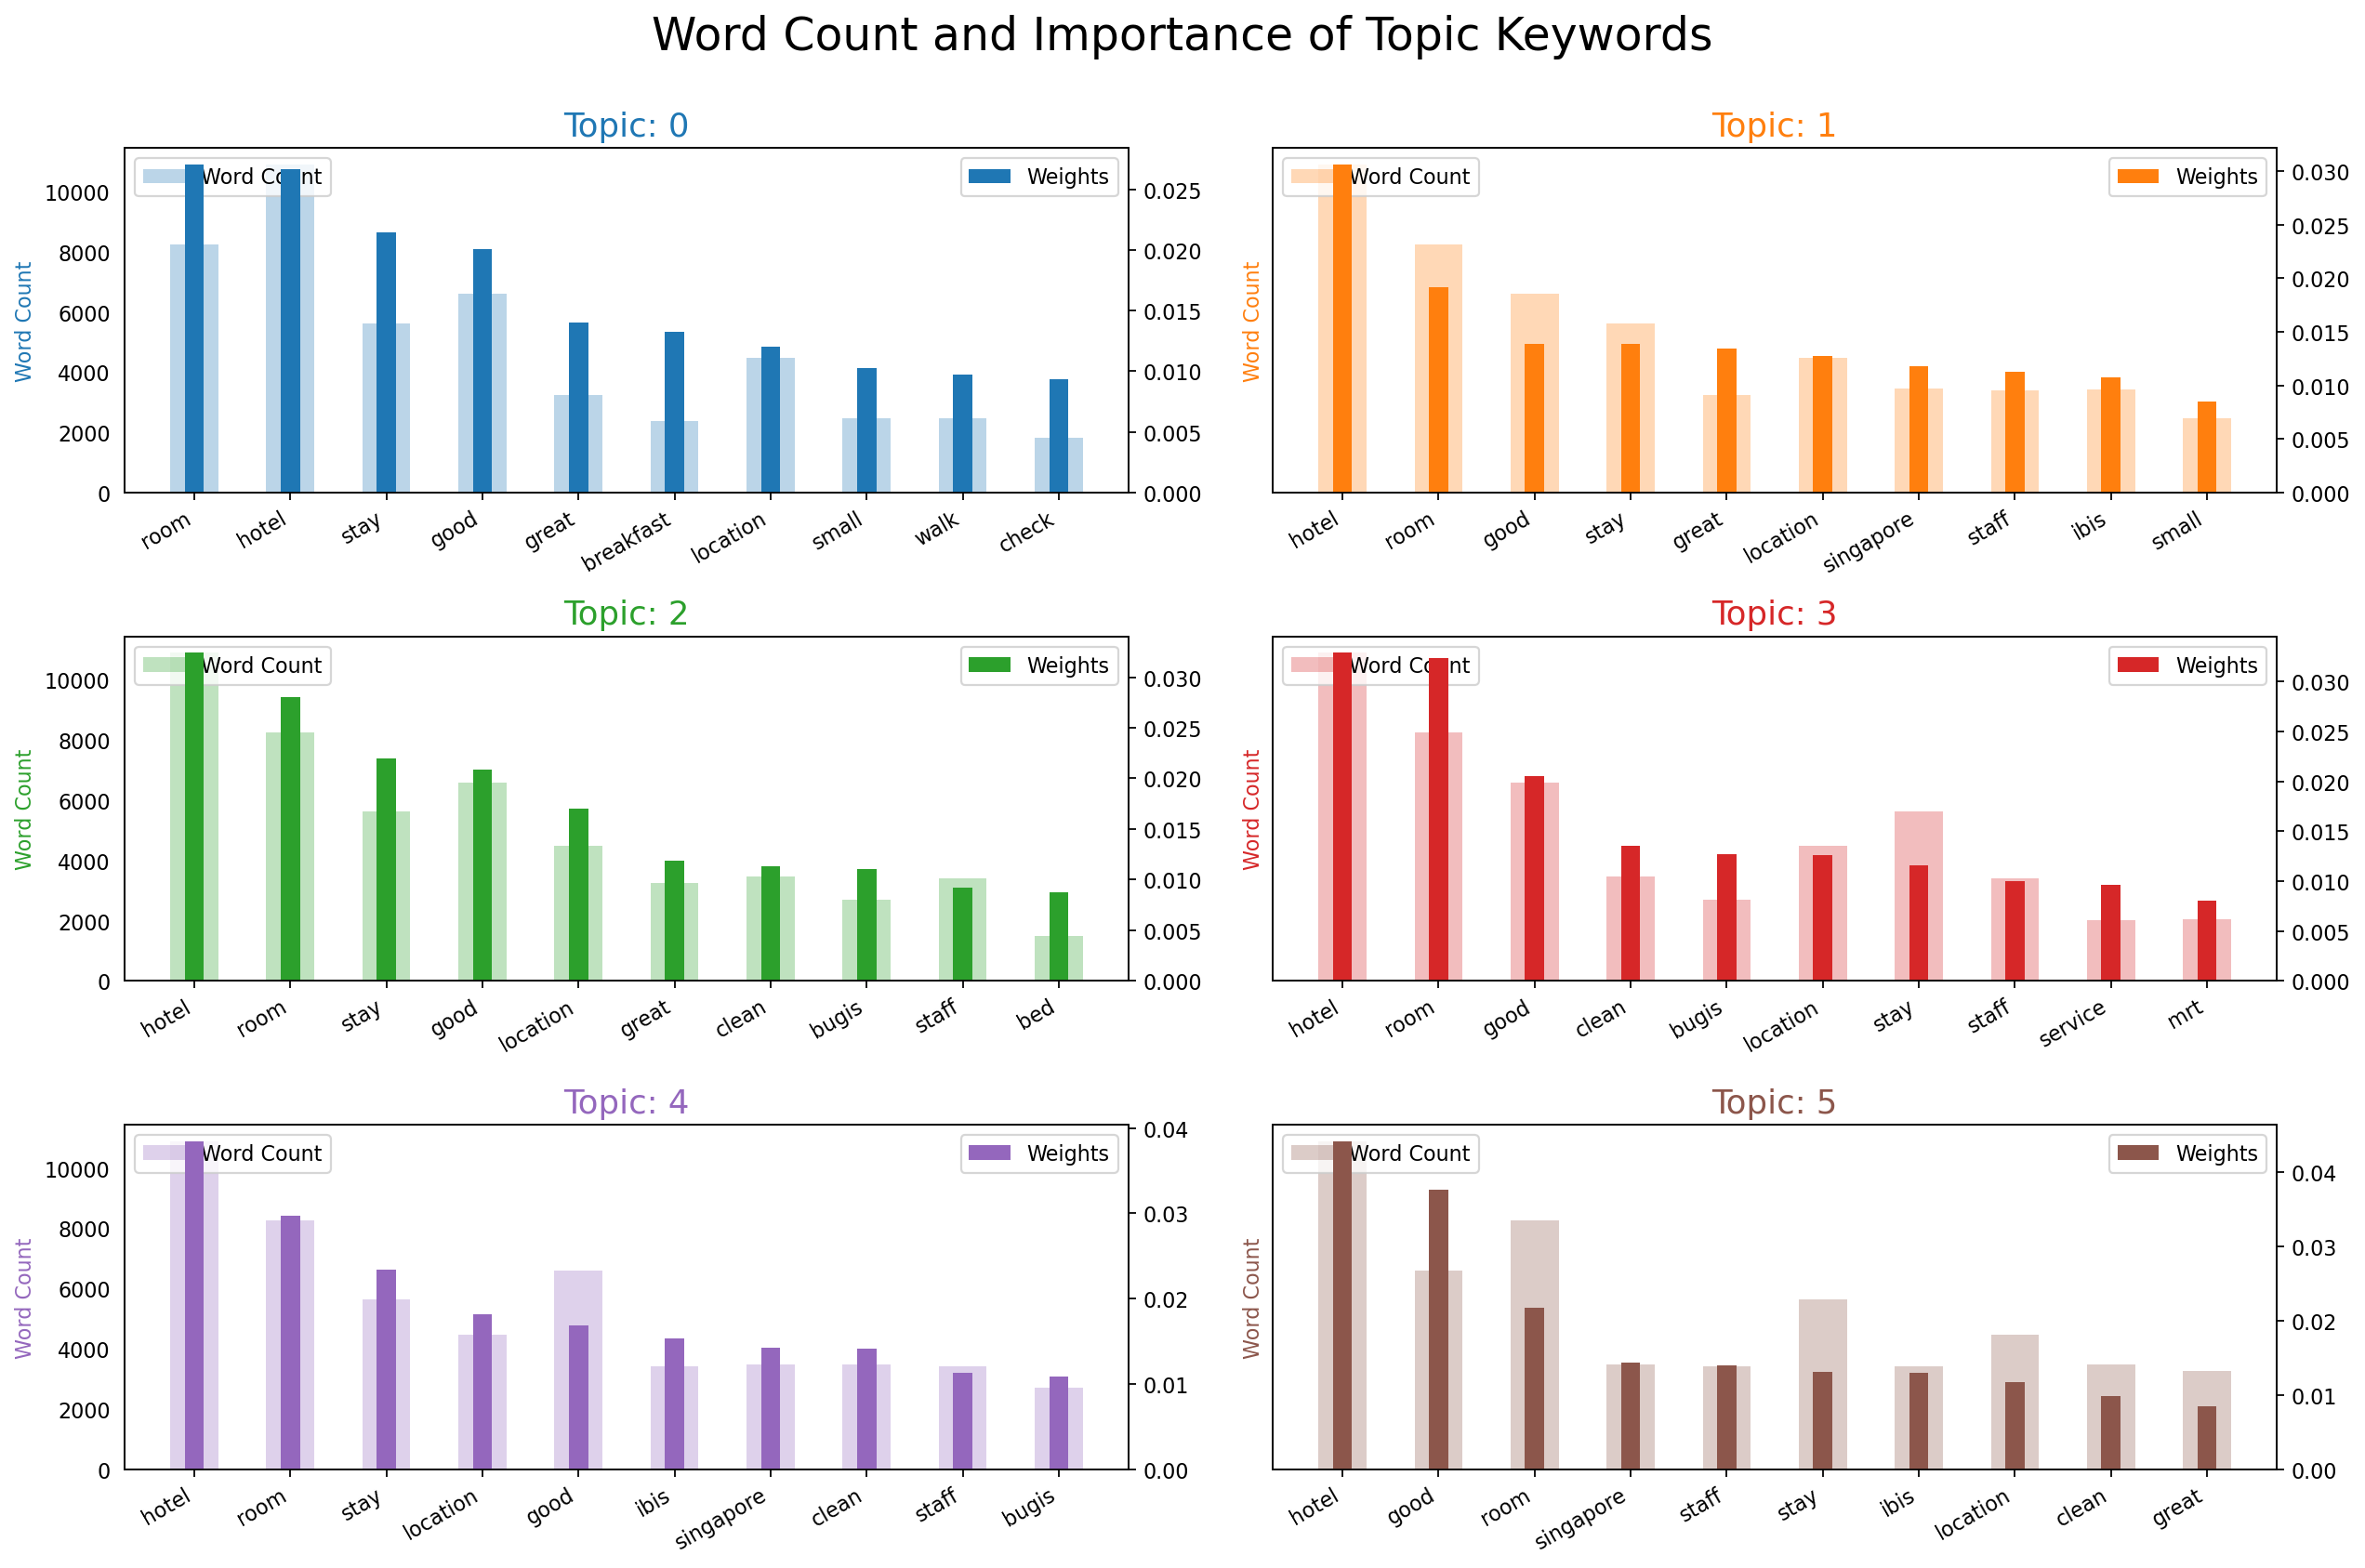

In [83]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_plot = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_plot.loc[df_plot.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

## No Stemming Post-Covid

In [84]:
analysis = []
stop_words = set(stopwords.words('english'))
for i, r in df_precovid.iterrows():
    r_lower = r['cleaned_review'].lower()
    res = word_tokenize(r_lower)
    analysis.append([w for w in res if w not in stop_words])


In [85]:
dictionary = corpora.Dictionary(analysis)
words = analysis
corpus = [dictionary.doc2bow(text) for text in words]
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 4),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 2),
 (16, 1),
 (17, 1)]

In [86]:
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=6)
print(lda_model.print_topics())

[(0, '0.035*"hotel" + 0.024*"room" + 0.016*"stay" + 0.014*"ibis" + 0.014*"great" + 0.014*"good" + 0.010*"location" + 0.010*"staff" + 0.009*"service" + 0.009*"singapore"'), (1, '0.039*"hotel" + 0.026*"room" + 0.021*"good" + 0.016*"stay" + 0.014*"staff" + 0.012*"location" + 0.011*"breakfast" + 0.011*"small" + 0.010*"great" + 0.009*"clean"'), (2, '0.031*"hotel" + 0.025*"room" + 0.016*"great" + 0.015*"stay" + 0.015*"good" + 0.014*"clean" + 0.013*"location" + 0.012*"bugis" + 0.011*"staff" + 0.010*"singapore"'), (3, '0.039*"hotel" + 0.033*"room" + 0.025*"stay" + 0.021*"good" + 0.014*"clean" + 0.012*"great" + 0.011*"location" + 0.011*"staff" + 0.011*"ibis" + 0.011*"bugis"'), (4, '0.034*"hotel" + 0.034*"good" + 0.026*"room" + 0.022*"location" + 0.018*"stay" + 0.018*"singapore" + 0.017*"ibis" + 0.012*"staff" + 0.010*"clean" + 0.009*"breakfast"'), (5, '0.033*"hotel" + 0.023*"room" + 0.014*"location" + 0.013*"stay" + 0.012*"good" + 0.010*"walk" + 0.010*"clean" + 0.010*"singapore" + 0.010*"check" 

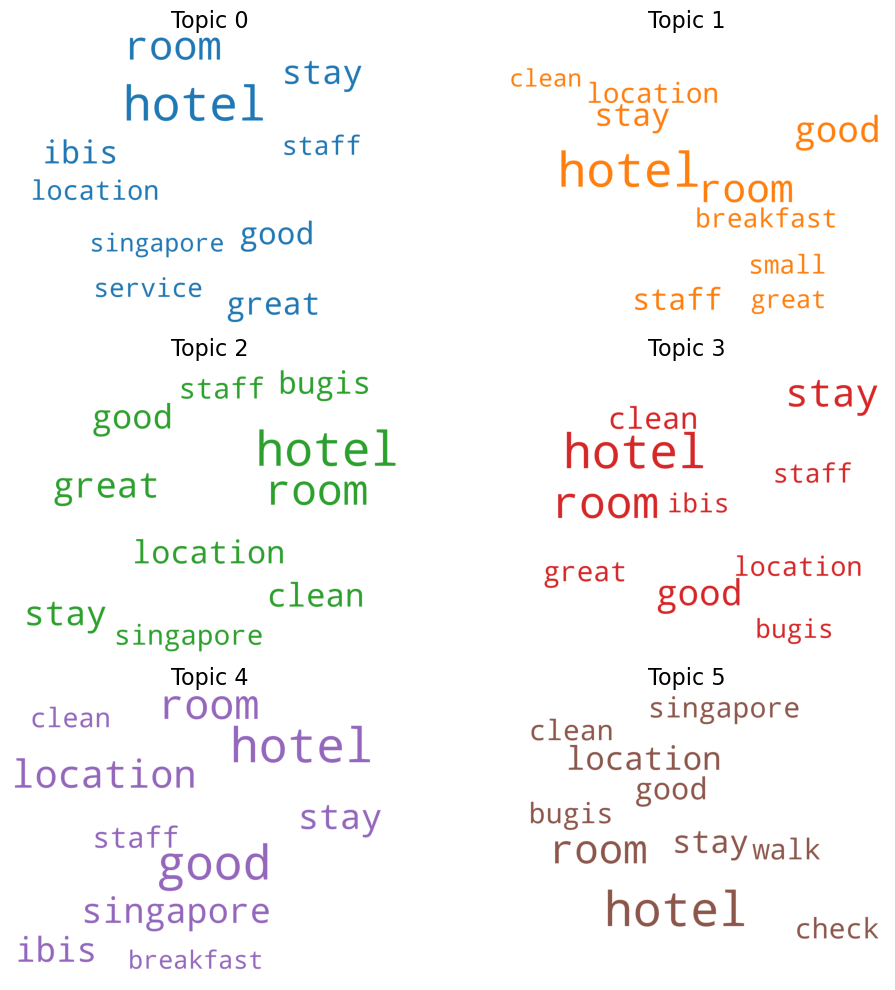

In [87]:
##visualisation
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                 color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

##From https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


C:\Users\Chen Wei\AppData\Local\Temp\ipykernel_2972\2069385899.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_plot.loc[df_plot.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


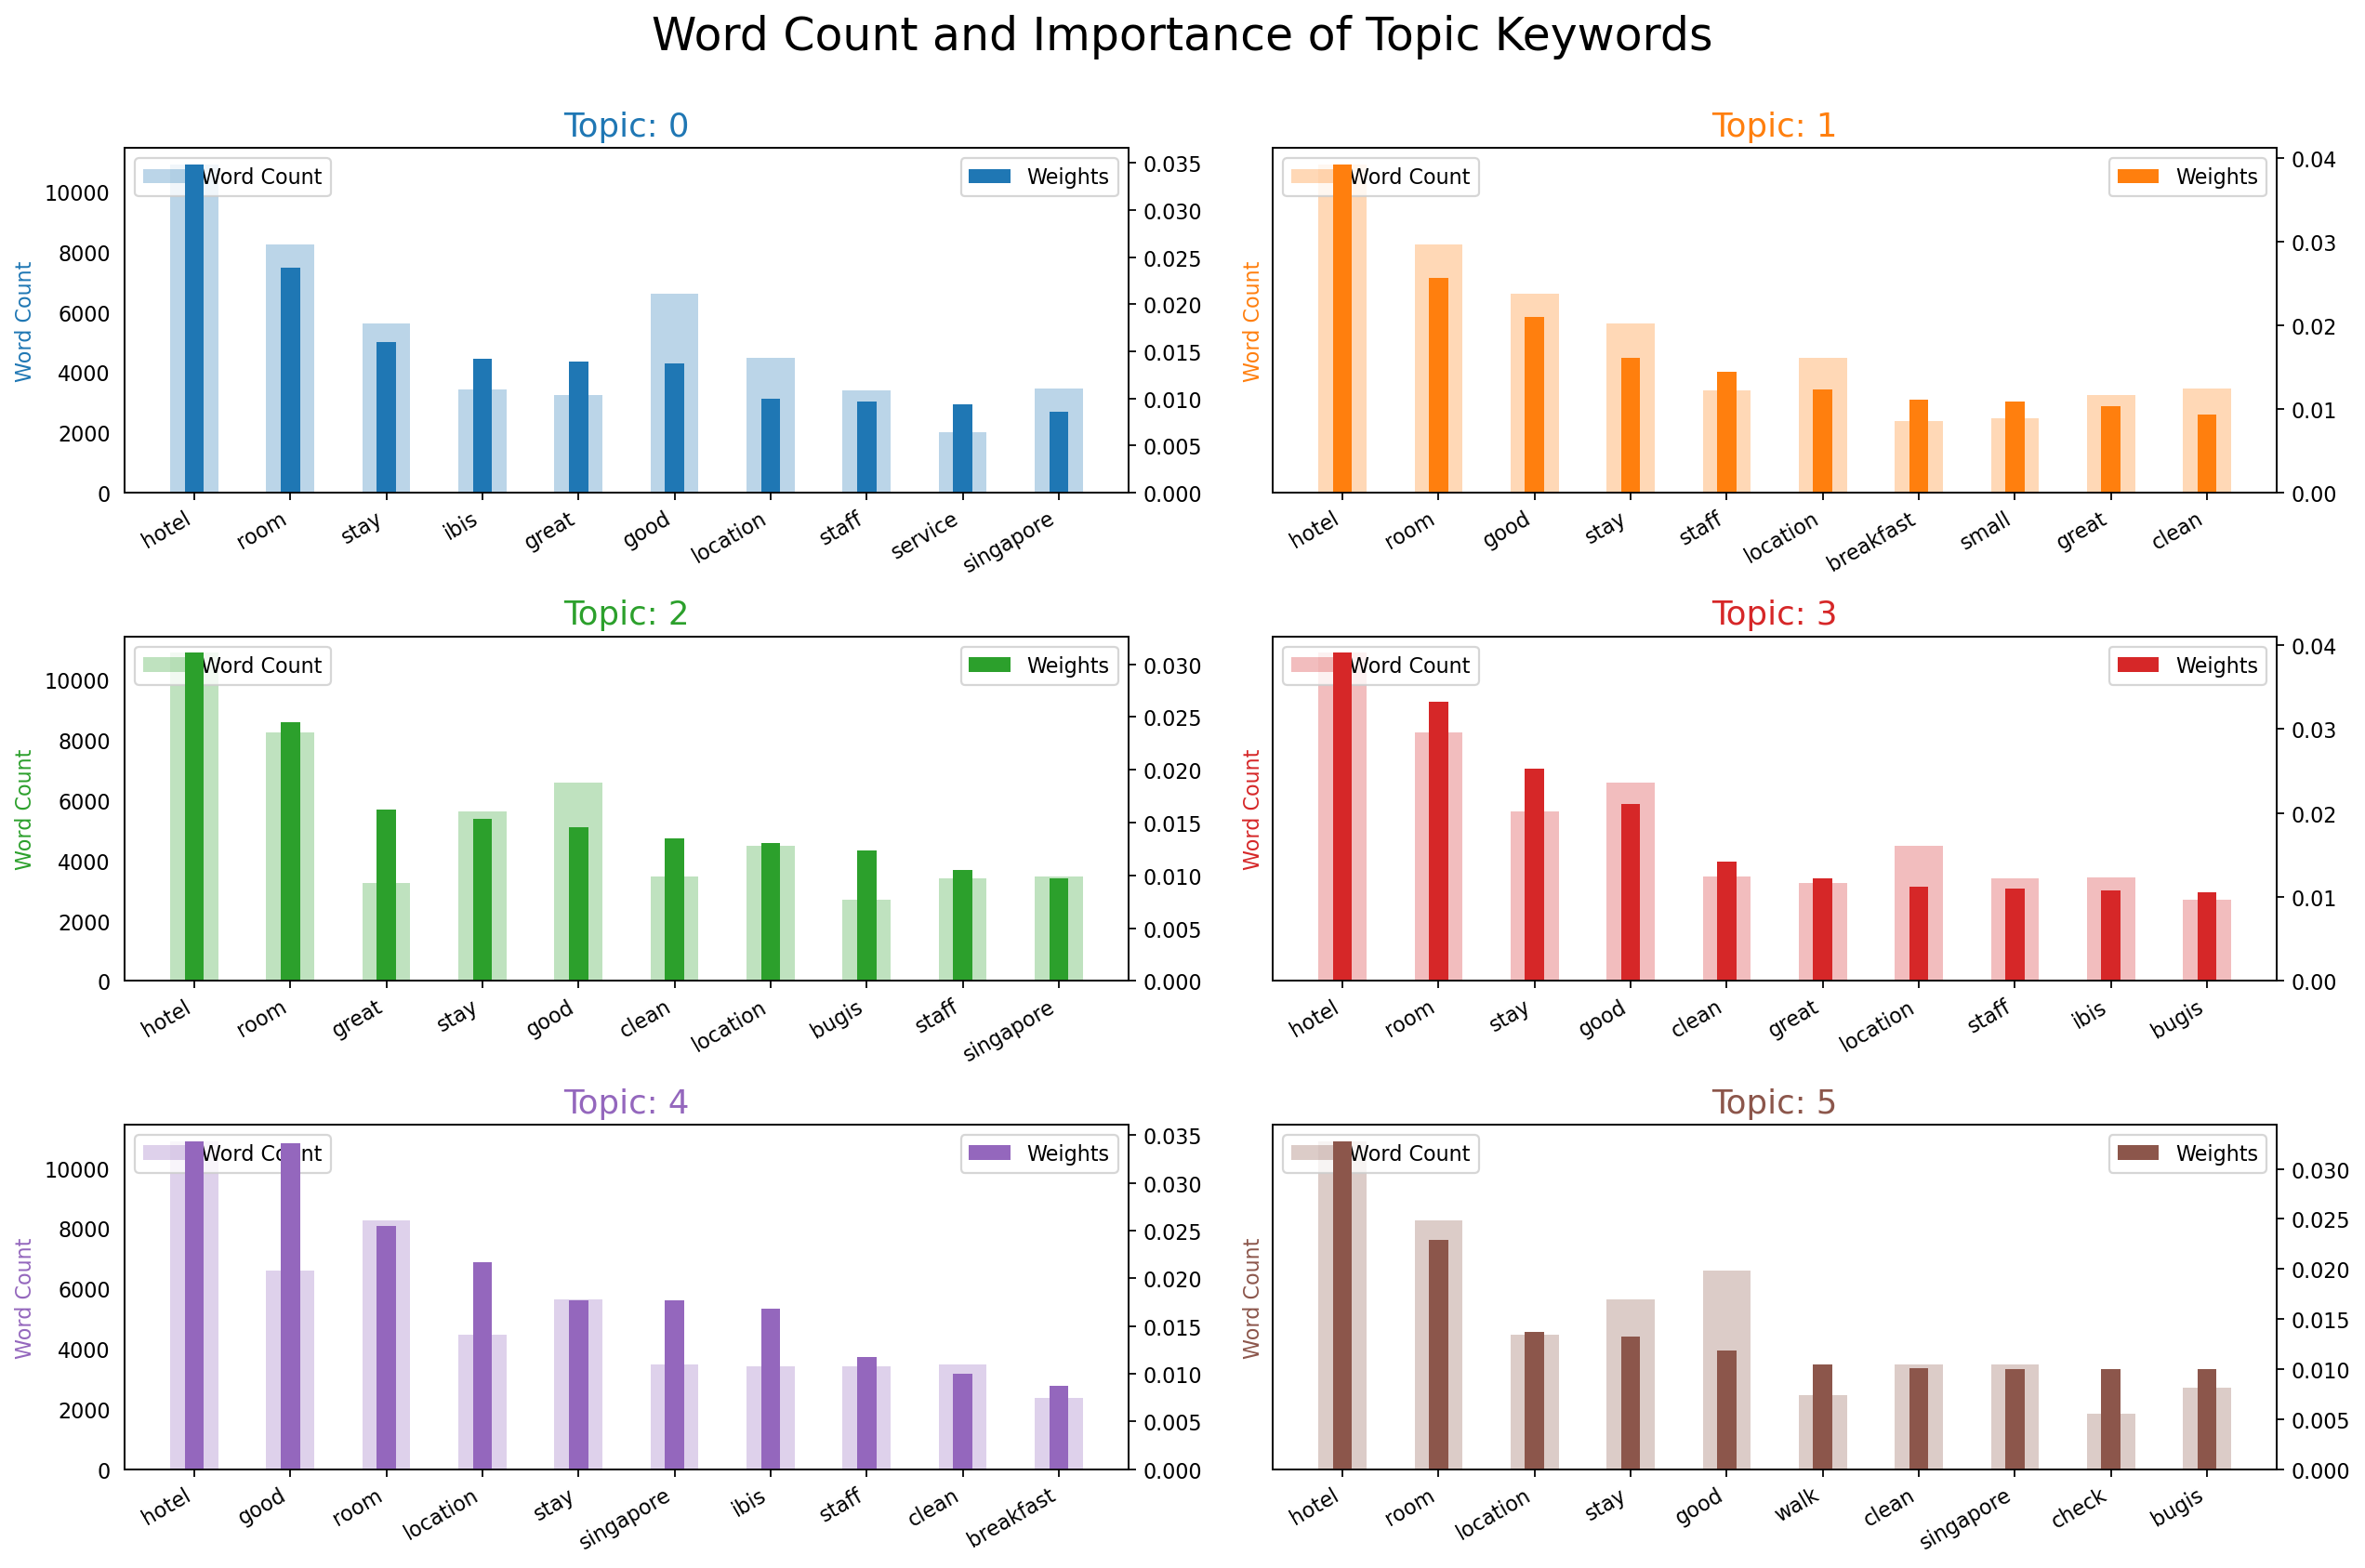

In [88]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in words for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_plot = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df_plot.loc[df_plot.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df_plot.loc[df_plot.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### Will try to see how to do cosine_similarity if I have time on Wed